<a href="https://colab.research.google.com/github/srinath68/NNDL/blob/main/Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BATCH GRADIENT DESCENT (ON REAL TIME DATA)**


In [1]:
# importing all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [3]:
# READING THE  DATA SET
data = pd.read_csv("water.csv")
data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


# **DATA ANALYSIS AND VISUALISATION**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,X,Y
count,30.000000,30.000000
mean,90.273333,514.963333
std,16.986078,39.535096
min,62.200000,406.700000
25%,75.300000,505.250000
50%,89.150000,510.100000
75%,104.375000,519.850000
max,120.000000,578.600000


# **NULL value Treatment**

In [6]:
data.isnull().sum()

X    0
Y    0
dtype: int64

Observation: the given dataset do not contain any null values

# **Outliners Treatment**

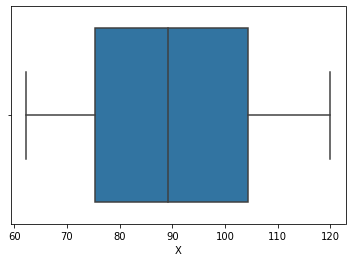

In [7]:
sns.boxplot(x=data['X'])

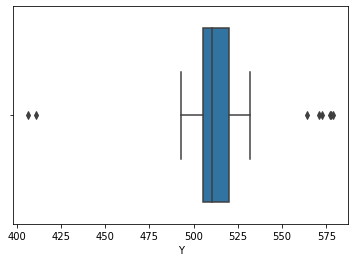

In [8]:
sns.boxplot(x=data['Y'])

From above box plot, we can conclude that the dataset is holding few outliners. we need to remove them

1.Using Z score

2.and Using ITQ

In [9]:
# Z-SCORE
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


In [10]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


Observation:no outliners are found using Z-score test

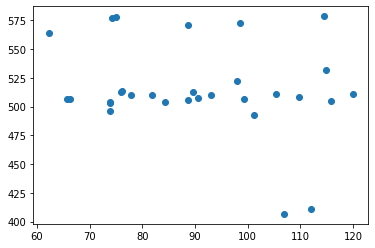

In [11]:
# Visualising data points using a Scatter plot
plt.scatter(data['X'],data['Y'])

In [12]:
# Implementing ITQ
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
iqr

X    29.075
Y    14.600
dtype: float64

In [13]:
data.shape

(30, 2)

In [14]:
data_cleared = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data_cleared.shape

(22, 2)

**After implementing ITQ, 8 rows are treated as outliners and those are ignored from dataset**

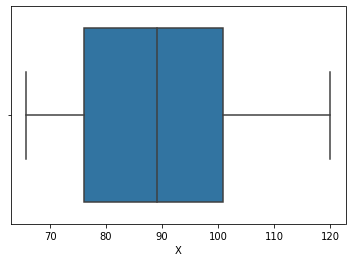

In [15]:
sns.boxplot(x=data_cleared['X'])

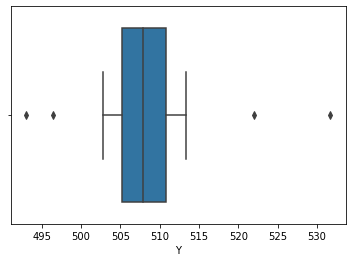

In [16]:
# outliners are reduced
sns.boxplot(x=data_cleared['Y'])

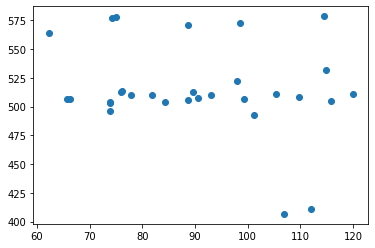

In [17]:
# scatter plot of data before data clean
plt.scatter(data['X'],data['Y'])

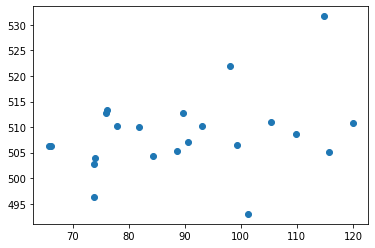

In [18]:
#scatter plot of data after data clean
plt.scatter(data_cleared['X'],data_cleared['Y'])

In [19]:
data2 = data.copy()
data = data_cleared.copy()

In [20]:
from sklearn.model_selection import train_test_split


# **Normalisation Of Data Set**

In [21]:
data_x = data['X']
data_y = data['Y']

# normalising the data
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x

data_x = np.array(data_x)
data_y = np.array(data_y)
datas =[]
for i in range(len(data_x)):
  datas.append([data_x[i],data_y[i]])

datas[1:10]

[[0.45672191528545114, 0.364341085271318],
 [0.14917127071823194, 0.08785529715762205],
 [0.9226519337016574, 0.31524547803617503],
 [0.6206261510128914, 0.3462532299741592],
 [0.5027624309392265, 0.44444444444444364],
 [0.15101289134438312, 0.2816537467700249],
 [0.0, 0.3410852713178288],
 [0.009208103130755065, 0.34366925064599474],
 [0.22467771639042364, 0.44444444444444364]]

In [22]:
# splitting of data set into training and testing
data_train,data_test = train_test_split(datas,test_size=0.1)

In [23]:
data_train

[[0.5948434622467771, 0.7493540051679578],
 [0.9226519337016574, 0.31524547803617503],
 [0.009208103130755065, 0.34366925064599474],
 [0.45672191528545114, 0.364341085271318],
 [0.9042357274401472, 1.0],
 [0.5027624309392265, 0.44444444444444364],
 [0.6556169429097605, 0.0],
 [0.3425414364640883, 0.2919896640826873],
 [0.4217311233885818, 0.3204134366925055],
 [0.15101289134438312, 0.2816537467700249],
 [0.0, 0.3410852713178288],
 [0.19337016574585636, 0.5271317829457353],
 [0.22467771639042364, 0.44444444444444364],
 [0.7311233885819522, 0.4625322997416009],
 [0.1878453038674034, 0.5116279069767424],
 [0.8121546961325966, 0.40310077519379856],
 [0.6206261510128914, 0.3462532299741592],
 [0.29834254143646416, 0.4392764857881132],
 [0.14917127071823194, 0.08785529715762205]]

# **Ready To Train The Model**

In [24]:
#STEP 2: initialising required parameters
m = 1
c = -1
iter = 1
epochs = 300
alpha = 0.1
error = []
data_train

[[0.5948434622467771, 0.7493540051679578],
 [0.9226519337016574, 0.31524547803617503],
 [0.009208103130755065, 0.34366925064599474],
 [0.45672191528545114, 0.364341085271318],
 [0.9042357274401472, 1.0],
 [0.5027624309392265, 0.44444444444444364],
 [0.6556169429097605, 0.0],
 [0.3425414364640883, 0.2919896640826873],
 [0.4217311233885818, 0.3204134366925055],
 [0.15101289134438312, 0.2816537467700249],
 [0.0, 0.3410852713178288],
 [0.19337016574585636, 0.5271317829457353],
 [0.22467771639042364, 0.44444444444444364],
 [0.7311233885819522, 0.4625322997416009],
 [0.1878453038674034, 0.5116279069767424],
 [0.8121546961325966, 0.40310077519379856],
 [0.6206261510128914, 0.3462532299741592],
 [0.29834254143646416, 0.4392764857881132],
 [0.14917127071823194, 0.08785529715762205]]

# **Gradient Descent Algorithm**

In [25]:

# while loop is runned until iter reaches epochs
while (iter<=epochs):
  # running for loop to calculate and update model parameters for each sample
  der_m = 0
  der_c = 0
  err = 0
  for i in range(0,len(data_train)):
    # calculating derivatives of m and c
    der_m += ((data_train[i][1] - (m * data_train[i][0]) - c ))*(data_train[i][0])
    der_c +=  (data_train[i][1] - (m * data_train[i][0]) - c )

  # computing error rate with present m and c values 
  err = (der_c)**2
  err = (err)/(2*len(data_train))
  error.append(err)


  der_m = (-1)*(1/len(data_train))*der_m
  der_c = (-1)*(1/len(data_train))*der_c

  # calculating change in m and c
  change_m = (-1)*alpha*der_m
  change_c = (-1)*alpha*der_c

  #updating m and c
  m = m + change_m
  c = c + change_c


  #incrementing no of iterations
  iter = iter + 1

In [26]:
# computed slope and y-intercept
print(m,c)

0.36913225799375 0.24031266400218648


In [27]:
data_test = np.array(data_test)
data_test_x = data_test[:,0]
print(data_test_x)
data_test_y = data_test[:,1]
data_test_y

[0.14917127 1.         0.44014733]


array([0.25322997, 0.45994832, 0.51162791])

In [28]:
# predicting results of test data set
pred = []
for i in range(len(data_test_x)):
  print((m*data_test_x[i]) +c)
  pred.append((m*data_test_x[i]) +c)

0.2953765919902044
0.6094449219959365
0.40278524164584434


# **Mean Squared error of testing data**

In [29]:
# computig mean squared error of testing data
mse = 0
for i in range(0,len(data_test)):
  mse += (data_test[i][1] - (m*data_test[i][0]) - c)**2
mse = mse/len(data_test)
mse

0.011990765691852834

# **Predicted Data Visualisation**

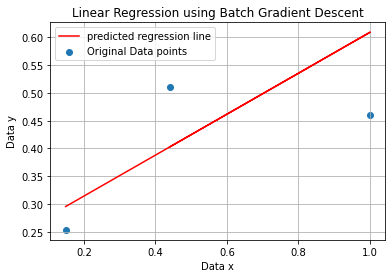

In [30]:
plt.scatter(data_test_x,data_test_y,label="Original Data points")
plt.plot(data_test_x,pred,'r',label="predicted regression line")
plt.title("Linear Regression using Batch Gradient Descent")
plt.xlabel("Data x")
plt.ylabel("Data y")
plt.grid()
plt.legend()
plt.show()

In [31]:
data_train = pd.DataFrame(data_train)

data_train_pred = m*data_train[0] + c
data_train_pred

0     0.459889
1     0.580893
2     0.243712
3     0.408903
4     0.574095
5     0.425898
6     0.482322
7     0.366756
8     0.395987
9     0.296056
10    0.240313
11    0.311692
12    0.323248
13    0.510194
14    0.309652
15    0.540105
16    0.469406
17    0.350441
18    0.295377
Name: 0, dtype: float64

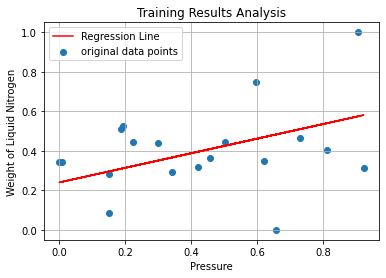

In [32]:
plt.plot(data_train[0],data_train_pred,'red',label="Regression Line")
plt.scatter(data_train[0],data_train[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

In [33]:
data_train.head()

,0,1
0,0.594843,0.749354
1,0.922652,0.315245
2,0.009208,0.343669
3,0.456722,0.364341
4,0.904236,1.000000


# **Error Rate Analysis**

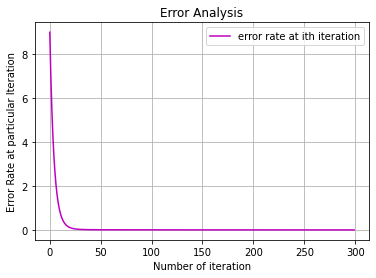

In [34]:
iters = np.arange(epochs)
plt.plot(iters,error,color='m',label="error rate at ith iteration")
plt.legend()
plt.xlabel("Number of iteration")
plt.ylabel("Error Rate at particular Iteration")
plt.title("Error Analysis")
plt.grid()
plt.show()

# **Mean Squared Error Of Training Data**

In [35]:
# computig mean squared error
mse = 0
mse = (data_train[1] - m*data_train[0] - c)**2
mse.sum()/len(data_train)

0.04165451638573208

In [36]:
min_x = data2['X'].min()
max_x = data2['X'].max()
min_y = data2['Y'].min()
max_y = data2['Y'].max()
print(min_x,min_y,max_x,max_y)

62.2 406.7 120.0 578.6


# **Model Ready To Take Input and Produce Output**

In [37]:
input_x = float(input("enter pressure"))
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = (output_y)*(max_y - min_y) + min_y
output_y

enter pressure78.6


466.0139493026274

In [38]:
err = 0
for i in range(0,len(data_x)):
  input_x = data2['X'][i]
  input_x = (input_x - min_x)/(max_x - min_x)
  output_y = m*input_x + c
  output_y = (output_y)*(max_y - min_y) + min_y
  err += (output_y-data2['Y'][i])**2
  print(output_y,data2['Y'][i])

print("\n",err)
print(err/len(data_x))

462.17158904273225 577.8
461.29333526904196 577.0
477.1019031954677 570.9
505.53536911869185 578.6
487.86051192317416 572.4
502.68104435419826 411.2
505.7549325621144 531.7
448.00974694197583 563.9
497.1919582686338 406.7
479.0779741862709 507.1
460.7444266604855 496.4
506.85274977922734 505.2
488.8485474185758 506.4
481.8225172290532 510.2
460.8542083821968 503.9
451.85210720187104 506.2
452.40101581042745 506.3
465.2454772506484 510.2
500.2658464765499 508.6
495.4354507212532 510.9
476.9921214737564 505.4
478.0899386908693 512.8

 93928.3532400909
4269.470601822314
